In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

In [ ]:
df_batsman = pd.read_csv('/content/drive/MyDrive/INTERN/Batsman_Data.csv')
df_bowler = pd.read_csv('/content/drive/MyDrive/INTERN/Bowler_data.csv')
df_ground_avg = pd.read_csv('/content/drive/MyDrive/INTERN/Ground_Averages.csv')
df_match_results = pd.read_csv('/content/drive/MyDrive/INTERN/ODI_Match_Results.csv')
df_match_totals = pd.read_csv('/content/drive/MyDrive/INTERN/ODI_Match_Totals.csv')
df_wc_players = pd.read_csv('/content/drive/MyDrive/INTERN/WC_players.csv')

In [ ]:
df_batsman.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [ ]:
df_bowler.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
df_ground_avg.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [ ]:
df_match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
df_match_totals.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
df_wc_players.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [ ]:
df_batsman.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [ ]:
df_bowler.isnull().sum()

Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64

In [ ]:
df_ground_avg.isnull().sum()

Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64

In [ ]:
df_match_results.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [ ]:
df_match_totals.isnull().sum()

Unnamed: 0      0
Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [ ]:
df_wc_players.isnull().sum()

Player     0
ID         0
Country    0
dtype: int64

In [ ]:
data=[df_batsman,df_bowler,df_ground_avg,df_match_results,df_match_totals,df_wc_players]


In [ ]:
def dementions(data):
    for i in data:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [ ]:
dementions(data)

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

In [ ]:
def stat_summary(data):
    for i in data:
        print(i.describe(include='all'))
        print('*'*100)

In [ ]:
stat_summary(data)

         Unnamed: 0   Bat1   Runs     BF     SR     4s     6s   Opposition  \
count   11149.00000  11149  11149  11149  11149  11149  11149        11149   
unique          NaN    323    180    163   2032     26     17           22   
top             NaN    DNB      -      -      -      0      0  v Sri Lanka   
freq            NaN   2043   2231   2231   2331   2901   6368         1283   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   

       Ground   Start Date    Match_ID    Batsman     Player_ID

In [ ]:
def seprate_date(data):
    for i in range(len(data)):
        if 'Start Date' in data[i].columns:
            data[i]['Year']=pd.to_datetime(data[i]['Start Date'])
            data[i]['Month']=data[i]['Year'].apply(lambda x:x.month) # Extracting Month
            data[i]['Day']=data[i]['Year'].apply(lambda x:x.day)  # Extracting day
            data[i]['year']=data[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(data[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")

In [ ]:
seprate_date(data)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8

In [ ]:
def drop_irrelevant(data):
    for i in range(len(data)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in data[i].columns]

        if irrelevant_columns:
            data[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(data[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")

In [ ]:
drop_irrelevant(data)

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Ko

In [ ]:
data

[       Bat1 Runs  BF     SR 4s 6s    Opposition     Ground    Match_ID  \
 0       DNB    -   -      -  -  -       v India     Nagpur  ODI # 2933   
 1       DNB    -   -      -  -  -       v India    Kolkata  ODI # 2935   
 2       DNB    -   -      -  -  -       v India      Delhi  ODI # 2936   
 3       DNB    -   -      -  -  -  v Bangladesh      Dhaka  ODI # 2937   
 4       DNB    -   -      -  -  -       v India      Dhaka  ODI # 2938   
 ...     ...  ...  ..    ... .. ..           ...        ...         ...   
 11144    46   46  61  75.40  6  1     v Ireland   Dehradun  ODI # 4100   
 11145     3    3   6  50.00  0  0     v Ireland   Dehradun  ODI # 4101   
 11146     1    1   8  12.50  0  0     v Ireland   Dehradun  ODI # 4108   
 11147   DNB    -   -      -  -  -    v Scotland  Edinburgh  ODI # 4131   
 11148  TDNB    -   -      -  -  -     v Ireland    Belfast  ODI # 4139   
 
               Batsman  Player_ID  Month  Day  year  
 0       Oshane Thomas      49619     12   1

In [ ]:
data_list=[df_batsman,df_bowler,df_ground_avg,df_match_results,df_match_totals,df_wc_players]

In [ ]:
# As we seen there are object type of data avilabe in the all the dataset so lets seaprate them and encode them into numeric form .
# lets seaprate the catogorical data & numirical data
from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(data_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for data in data_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = data.columns.values.tolist()

        for col in features:
            if data[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(data_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(data_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(data_list[i][col])
            data_list[i][col] = encoded_values

In [ ]:
label_encode_categorical_columns(data_list)

In [ ]:
df_bowler.head()

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009
2,0,0,0,0,0,0,0,9,37,762,138,49619,12,27,2009
3,55,2,66,3,406,120,70,4,38,763,138,49619,1,4,2010
4,49,2,49,1,349,0,0,9,38,764,138,49619,1,5,2010


In [ ]:
df_ground_avg.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60
2,55,6,15,15,0,0,7656,217,8482,35.28,5.41
3,76,2,2,2,0,0,1163,26,1200,44.73,5.81
4,0,6,10,10,0,0,4863,157,5645,30.97,5.16


In [ ]:
df_batsman.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,319,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,319,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,319,0,0,0,0,0,9,38,764,113,49619,1,5,2010


In [ ]:
df_match_results.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404,48.3,165,NaN,1,4,5,57,0,6,7,1,3,2013
1,115,48.0,25,251.0,2,1,11,57,0,4,6,1,3,2013
2,93,48.5,18,168.0,2,1,5,29,1,6,7,1,6,2013
3,120,43.4,48,NaN,1,4,11,29,1,4,6,1,6,2013
4,199,40.0,146,306.0,2,1,1,63,2,8,8,1,11,2013


In [ ]:
df_match_totals.head()

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6,160,NaN,1,1,5,57,0,6,7,1,3,2013
1,3,160,NaN,2,2,11,57,0,4,6,1,3,2013
2,3,3,NaN,1,2,5,29,1,6,7,1,6,2013
3,6,3,NaN,2,1,11,29,1,4,6,1,6,2013
4,3,10,NaN,1,2,1,63,2,8,8,1,11,2013


In [ ]:
df_wc_players.head()

,Player,ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0


In [ ]:
df_match_results.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [ ]:
df_match_totals.isnull().sum()

Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [ ]:
imputer = IterativeImputer()
data_list2 = [df_match_results,df_match_totals]

def treat_missing_value(data_list2):
    for i in range(len(data_list2)):
        df_imputed = imputer.fit_transform(data_list2[i])
        data_list2[i] = pd.DataFrame(df_imputed, columns=data_list2[i].columns)
        print("DataFrame", i, "after imputation:")
        print(data_list2[i].isnull().sum()) #Lets Check the Values treated well or not
        print("-------------------------")

In [ ]:
df_match_totals=data_list2[0]
df_match_results=data_list2[1]

In [ ]:
batsman_join_bowler=pd.merge(df_batsman,df_bowler,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Day,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler
0,319,0,0,0,0,0,9,92,759,113,...,18,2009,49,1,59,1,412,0,0,138
1,319,0,0,0,0,0,9,78,761,113,...,24,2009,12,1,57,3,316,103,77,138
2,319,0,0,0,0,0,9,37,762,113,...,27,2009,0,0,0,0,0,0,0,138
3,319,0,0,0,0,0,4,38,763,113,...,4,2010,55,2,66,3,406,120,70,138
4,319,0,0,0,0,0,9,38,764,113,...,5,2010,49,2,49,1,349,0,0,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,99,57,104,826,2,1,9,40,1758,42,...,25,2018,25,1,42,1,35,0,0,42
11114,203,121,121,1409,22,2,10,36,1809,42,...,28,2019,45,1,19,3,112,5,60,42
11115,167,103,119,969,1,1,10,36,1810,42,...,2,2019,0,0,0,0,0,0,0,42
11116,2,2,141,330,1,1,10,36,1817,42,...,8,2019,37,1,20,2,171,80,83,42


In [ ]:
batsman_join_bowler_GrondAvg=pd.merge(batsman_join_bowler,df_ground_avg,on=['Ground'], how='inner')
batsman_join_bowler_GrondAvg

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,319,0,0,0,0,0,9,92,759,113,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,12,7,21,1757,24,10,9,92,84,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,217,128,104,240,3,1,9,92,391,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,184,111,81,572,20,1,9,92,759,11,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,319,0,0,0,0,0,9,92,927,25,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,217,128,117,1780,22,2,10,36,1817,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,180,109,84,389,13,9,10,36,1819,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,203,121,121,1409,22,2,10,36,1809,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,167,103,119,969,1,1,10,36,1810,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [ ]:
df_match_results.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Ground', 'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [ ]:
df_match_totals.columns

Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition', 'Ground',
       'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [ ]:
OD_Total_result=pd.merge(df_match_results,df_match_totals,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Score,Overs,RPO,Target,Inns,Result_x,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,404,48.3,165,NaN,1,4,5,57,0,6,7,1,3,2013,6,160,NaN,1,1,0
1,115,48.0,25,251.0,2,1,11,57,0,4,6,1,3,2013,3,160,NaN,2,2,0
2,93,48.5,18,168.0,2,1,5,29,1,6,7,1,6,2013,3,3,NaN,1,2,1
3,120,43.4,48,NaN,1,4,11,29,1,4,6,1,6,2013,6,3,NaN,2,1,1
4,199,40.0,146,306.0,2,1,1,63,2,8,8,1,11,2013,3,10,NaN,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,750,50.0,309,NaN,1,1,3,72,739,6,7,5,17,2019,3,99,3.0,1,1,755
1292,753,49.3,315,341.0,2,4,11,72,739,3,1,5,17,2019,6,99,3.0,2,2,755
1293,27,33.0,38,211.0,2,0,6,7,740,0,40,5,19,2019,0,0,NaN,2,2,757
1294,187,31.5,249,352.0,2,0,3,60,741,6,7,5,19,2019,0,0,NaN,1,2,758


In [ ]:
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GrondAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Opposition_y,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,140,86,14,677,1,1,15,1,1225,113,...,11,123,8,8,3,154,53.0,2,1,126
1,140,86,14,677,1,1,15,1,1225,113,...,14,123,6,7,6,154,53.0,1,2,126
2,0,1,108,1,1,1,15,1,1225,80,...,11,123,8,8,3,154,53.0,2,1,126
3,0,1,108,1,1,1,15,1,1225,80,...,14,123,6,7,6,154,53.0,1,2,126
4,277,158,141,4,2,1,15,1,1225,78,...,11,123,8,8,3,154,53.0,2,1,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,191,115,131,1056,2,2,10,36,1819,99,...,14,719,7,3,6,144,NaN,1,1,733
1040,284,161,16,1375,22,9,10,36,1819,13,...,13,719,8,8,3,144,NaN,2,2,733
1041,284,161,16,1375,22,9,10,36,1819,13,...,14,719,7,3,6,144,NaN,1,1,733
1042,180,109,84,389,13,9,10,36,1819,117,...,13,719,8,8,3,144,NaN,2,2,733


In [ ]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y'],
      dtype='object')

In [ ]:
wc_player=df_wc_players.rename(columns={'ID':'Player_ID'})

In [ ]:
master_after_join=pd.merge(batsman_join_bowler_GrondAvg_OD,wc_player,on=['Player_ID','Country'], how='inner')
master_after_join

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player
0,0,1,108,1,1,1,15,1,1225,80,...,123,8,8,3,154,53.0,2,1,126,80
1,0,1,2,1,1,1,15,1,1227,80,...,125,8,8,6,73,2.0,1,2,128,80
2,2,2,130,518,1,1,0,1,1750,80,...,648,8,8,3,167,NaN,1,2,662,80
3,319,0,0,0,0,0,3,2,1106,80,...,4,8,8,6,154,59.0,2,2,4,80
4,277,158,141,4,2,1,15,1,1225,78,...,123,8,8,3,154,53.0,2,1,126,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,319,0,0,0,0,0,13,5,1590,9,...,488,7,3,6,131,106.0,2,2,501,9
506,154,96,109,946,18,1,17,5,1590,93,...,488,5,5,3,131,106.0,1,1,501,94
507,5,3,130,535,13,1,15,5,1485,93,...,383,5,5,6,99,2.0,1,2,393,94
508,255,147,74,849,1,1,3,5,1574,93,...,472,5,5,6,130,NaN,1,1,484,94


In [ ]:
master_after_join['Batting Average'] = master_after_join['Bat1'] / master_after_join['Inns']

In [ ]:
print(master_after_join[['Player', 'Batting Average']])

     Player  Batting Average
0        80              0.0
1        80              0.0
2        80              1.0
4        78            277.0
5        78            102.5
..      ...              ...
502      57            207.0
506      94            154.0
507      94              2.5
508      94            255.0
509      94            180.0

[444 rows x 2 columns]


In [ ]:
# Calculate Bowling Average for each player
master_after_join['Bowling Average'] = master_after_join['Runs_y'] / master_after_join['Wkts_y']

# Display the Bowling Average for each player
print(master_after_join[['Player', 'Bowling Average']])

     Player  Bowling Average
0        80         2.733333
1        80         3.933333
2        80         4.600000
4        78         0.000000
5        78         0.000000
..      ...              ...
502      57         1.041667
506      94         1.979167
507      94         1.208333
508      94         0.937500
509      94         0.020833

[444 rows x 2 columns]


<ipython-input-219-bc4d33ba7f9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_after_join['Bowling Average'] = master_after_join['Runs_y'] / master_after_join['Wkts_y']


In [ ]:
master_after_join = master_after_join[master_after_join['BF'] > 0]

In [ ]:
master_after_join.head(5)

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,0,1,108,1,1,1,15,1,1225,80,...,2,1,126,80,0.0,2.733333,0.000000,0.845361,262,0.179688
1,0,1,2,1,1,1,15,1,1227,80,...,1,2,128,80,0.0,3.933333,0.000000,1.194332,262,0.256694
2,2,2,130,518,1,1,0,1,1750,80,...,1,2,662,80,1.0,4.600000,1.538462,1.674757,262,0.324796
4,277,158,141,4,2,1,15,1,1225,78,...,2,1,126,78,277.0,0.000000,196.453901,0.000000,262,0.267204
5,205,122,99,256,18,11,15,1,1227,78,...,1,2,128,78,102.5,0.000000,207.070707,0.000000,262,0.102335


In [ ]:
master_after_join['Strike Rate (Batting)'] = (master_after_join['Bat1'] / master_after_join['BF']) * 100

# Display the Strike Rate (Batting) for each player
print(master_after_join[['Player', 'Strike Rate (Batting)']])

     Player  Strike Rate (Batting)
0        80               0.000000
1        80               0.000000
2        80               1.538462
4        78             196.453901
5        78             207.070707
..      ...                    ...
502      57             200.970874
506      94             141.284404
507      94               3.846154
508      94             344.594595
509      94             187.500000

[444 rows x 2 columns]


In [ ]:
master_after_join['Economy Rate (Bowling)'] = (master_after_join['Runs_y'] / master_after_join['Overs_y'])

# Display the Economy Rate (Bowling) for each player
print(master_after_join[['Player', 'Economy Rate (Bowling)']])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]


In [ ]:
# Calculate the total Maiden Overs for each player
master_after_join['Maiden Overs Total'] = master_after_join['Mdns'].sum()

# Display the total Maiden Overs for each player
print(master_after_join[['Player', 'Maiden Overs Total']])

     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [ ]:
# Step 1: Choose relevant performance metrics
batting_average = master_after_join['Batting Average']
bowling_average = master_after_join['Bowling Average']
strike_rate_batting = master_after_join['Strike Rate (Batting)']
economy_rate_bowling = master_after_join['Economy Rate (Bowling)']
maiden_overs = master_after_join['Maiden Overs Total']

#Step 2: Normalize the selected performance metrics
# You can use Min-Max Scaling or Z-score normalization
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN

# Step 3: Assign weights to each performance metric
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25


# Step 4: Calculate the composite performance score for each player
master_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

# Step 5: Display the Player Performance Score for each player
print(master_after_join[['Player', 'Player Performance Score']])

     Player  Player Performance Score
0        80                  0.179688
1        80                  0.256694
2        80                  0.324796
4        78                  0.267204
5        78                  0.102335
..      ...                       ...
502      57                  0.327119
506      94                  0.423807
507      94                  0.166335
508      94                  0.363639
509      94                  0.177696

[444 rows x 2 columns]


In [ ]:
master_after_join.shape

(444, 55)

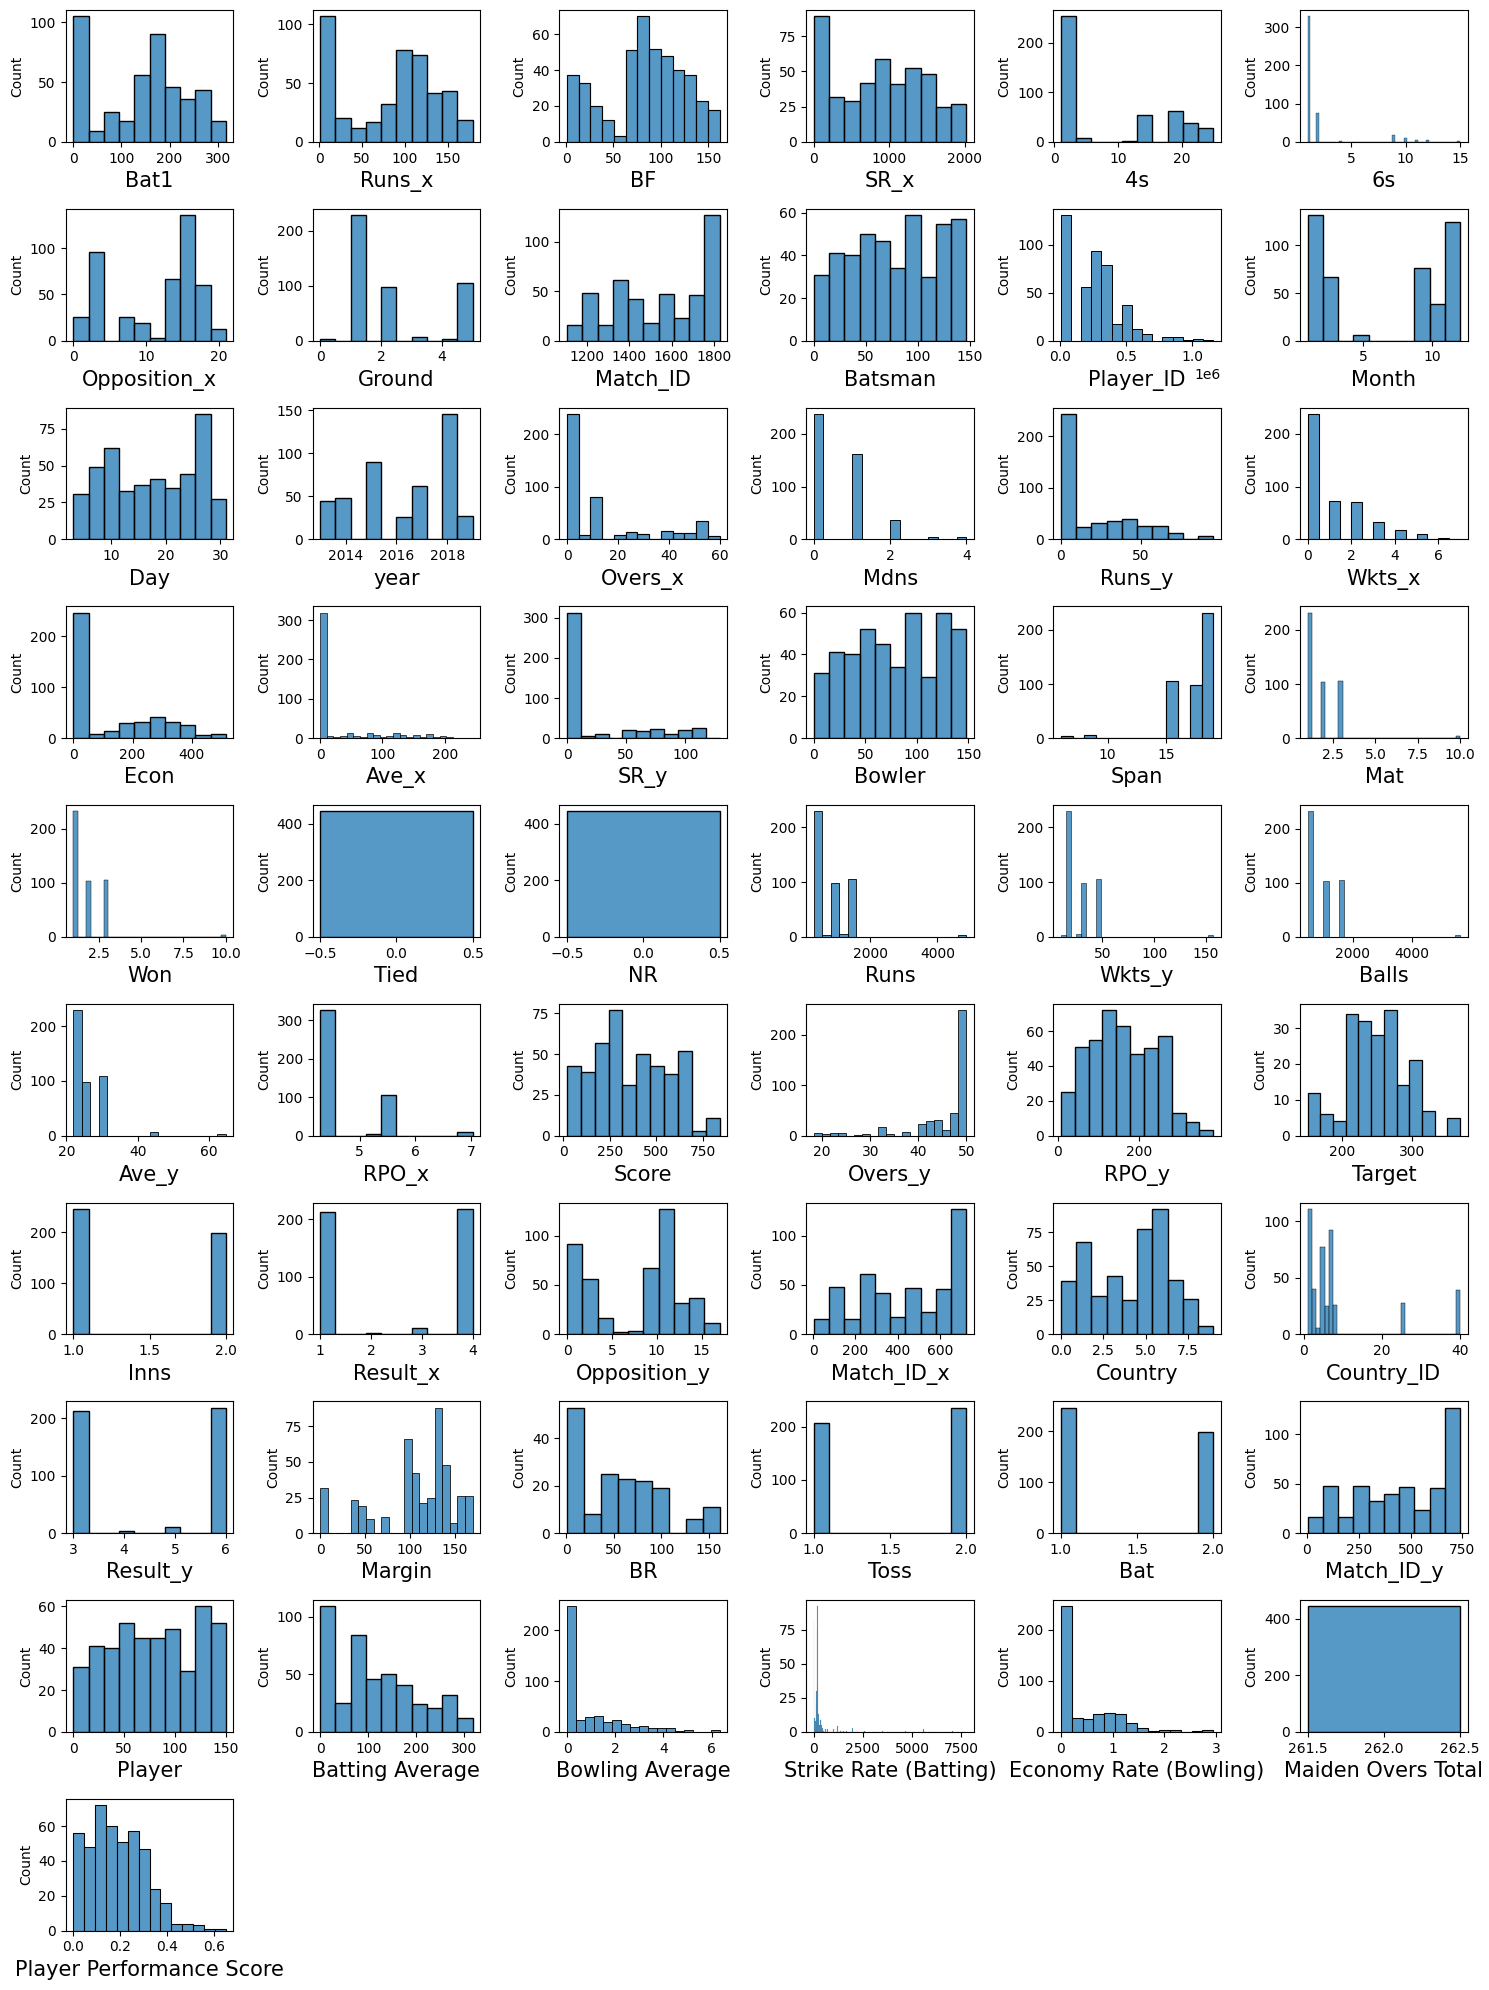

In [ ]:
#distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.histplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [ ]:
master_after_join.skew()

Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.578048
6s                          2.952126
Opposition_x               -0.516344
Ground                      0.970068
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                   0.979422
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Bowler                     -0.097655
Span                       -2.101193
Mat                         3.289249
Won                         3.289249
Tied                        0.000000
NR                          0.000000
R

In [ ]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

In [ ]:
master_after_join.skew()[(master_after_join.skew() >= 0.5) & (master_after_join.skew() >= -0.5)]

4s                        0.578048
6s                        2.952126
Ground                    0.970068
Player_ID                 0.979422
Overs_x                   1.262778
Mdns                      1.473151
Runs_y                    1.019444
Wkts_x                    1.420556
Econ                      0.740863
Ave_x                     1.770862
SR_y                      1.372929
Mat                       3.289249
Won                       3.289249
Runs                      2.546417
Wkts_y                    2.866807
Balls                     2.933363
Ave_y                     3.219416
RPO_x                     1.697543
Country_ID                2.054187
BR                        0.691619
Bowling Average           1.558220
Strike Rate (Batting)     5.879068
Economy Rate (Bowling)    1.403963
dtype: float64

In [ ]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

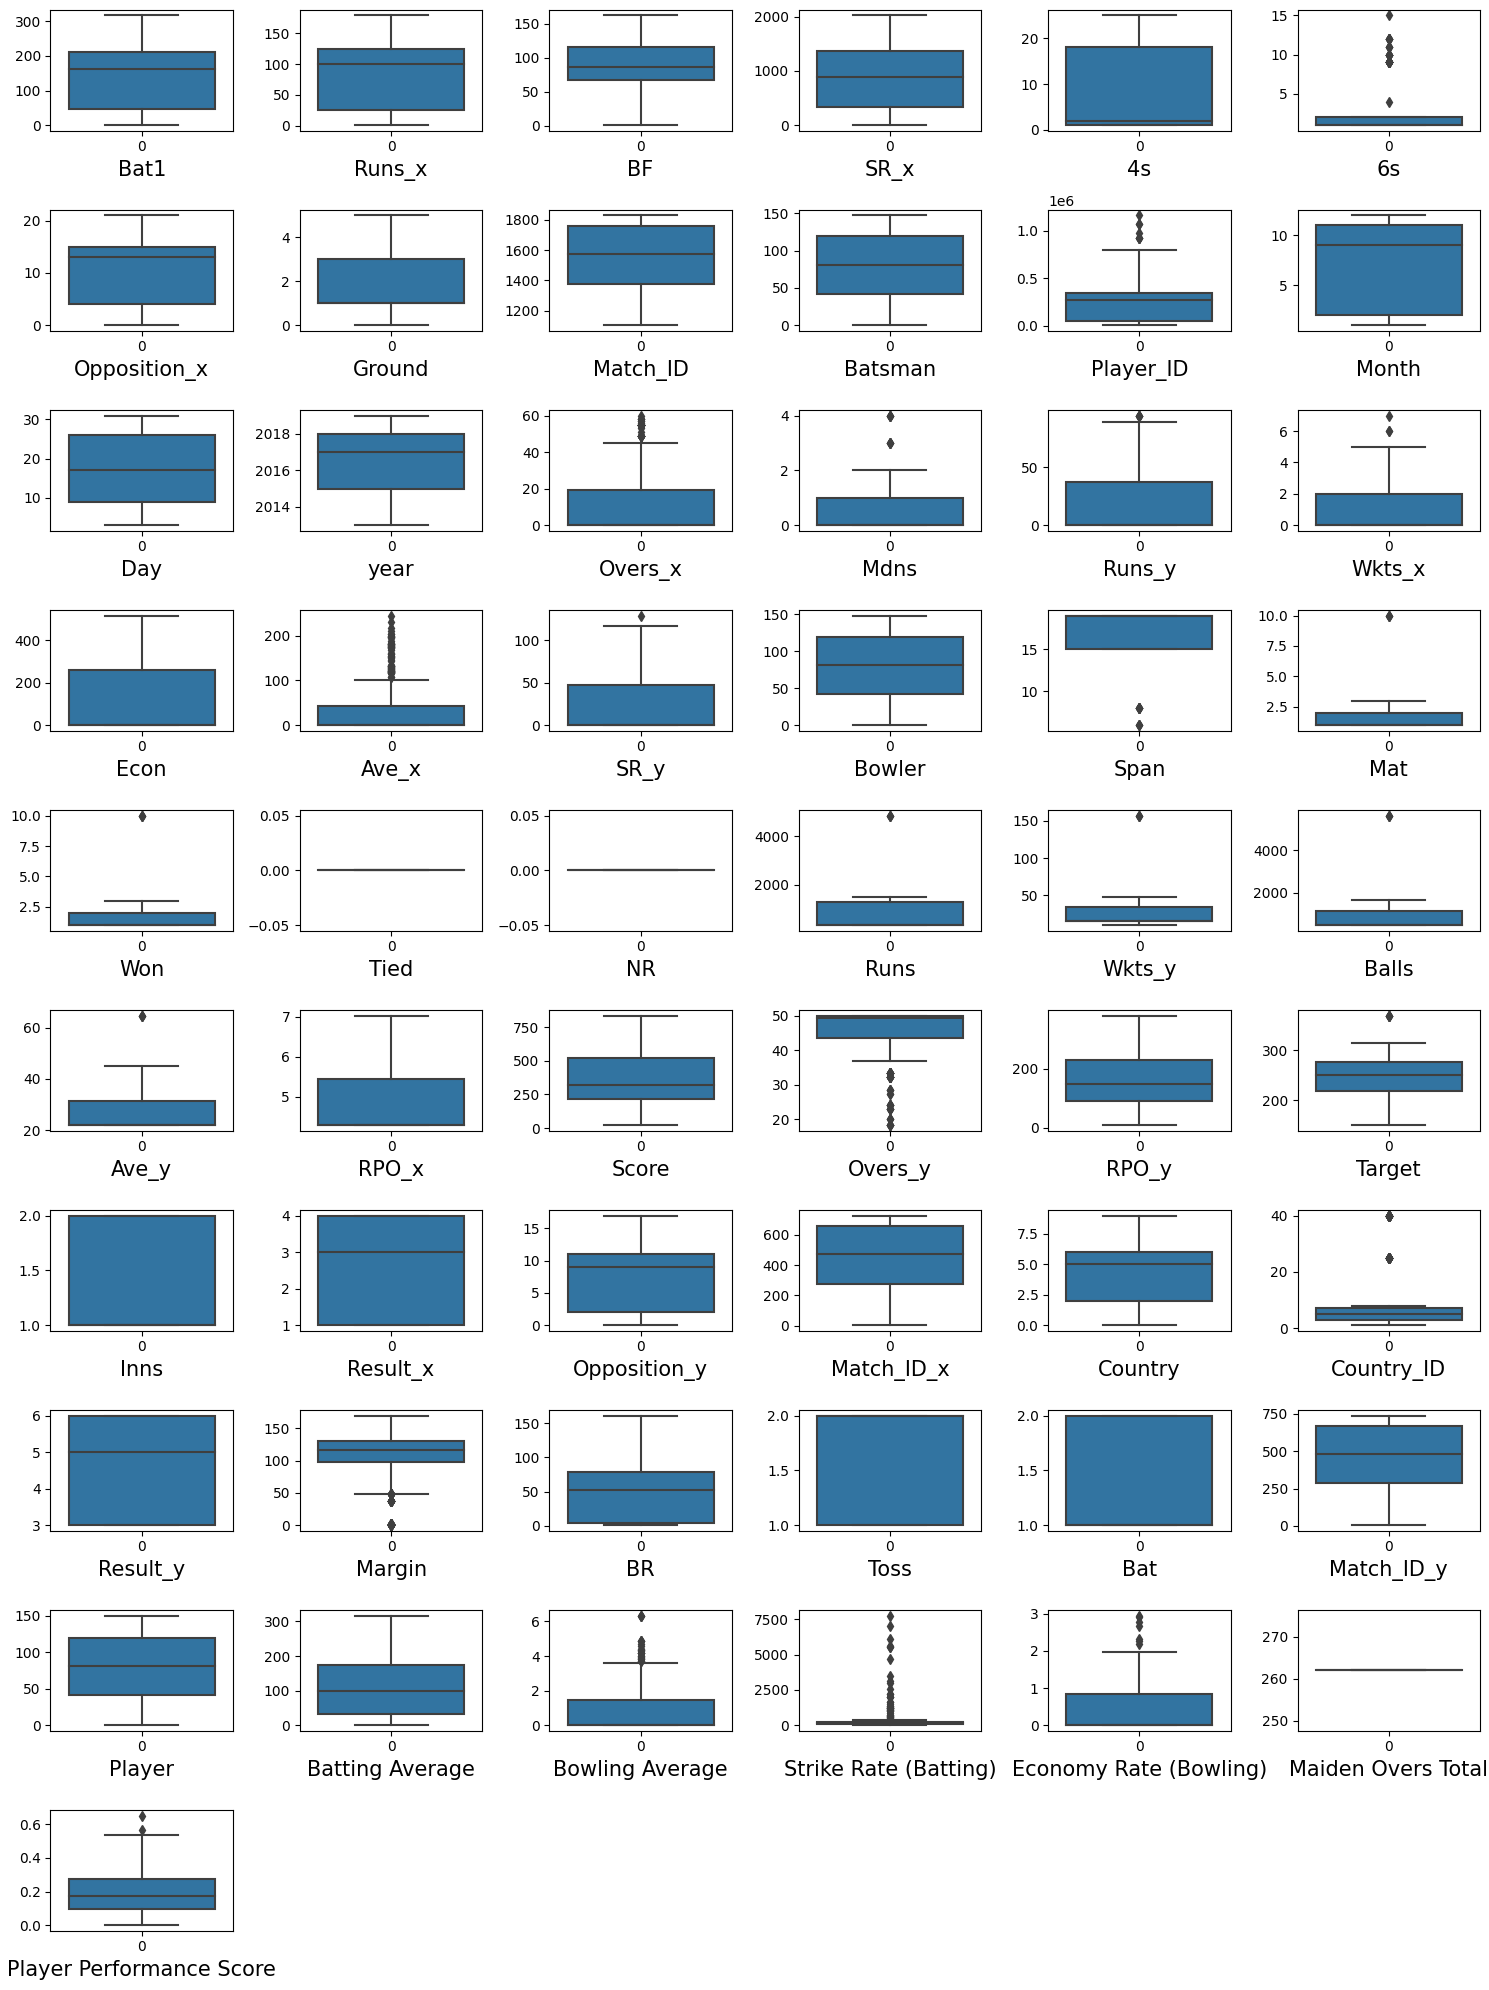

In [ ]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [ ]:
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','Strike Rate (Batting)','Player Performance Score']

In [ ]:
x = master_after_join[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

y = master_after_join['Player Performance Score']  # Target column

In [ ]:
print(x.shape, y.shape)

(444, 48) (444,)


In [ ]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [ ]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

MissingDataError: ignored

In [ ]:
pca=PCA()
pca.fit_transform(x_scaled)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

In [ ]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

In [ ]:
# Lets select the proper random state to build best model by using LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):

    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= i )

    lr = LinearRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data

    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data

    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )

In [ ]:
LR= LinearRegression()

dt=DecisionTreeRegressor()

ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

rfc= RandomForestRegressor()


xgb=xgb.XGBRegressor()

knn=KNeighborsRegressor()



models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))

In [ ]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)

    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)

    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

In [ ]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

In [ ]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

In [ ]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

In [ ]:
para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator=LR, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

In [ ]:
LR= LinearRegression(n_jobs= 17)

LR.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100)
pred=LR.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)

accuracies= cross_val_score(LR,x_scaled, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))